## **Exploratory Data Analysis - Terrorism**

#### The objective of this notebook is to analyze the dataset to use graphs in the presentation of the integrated work of psychology, sociology and philosophy of the public administration college in UDESC-ESAG Florianópolis.


### Author: Jairo Fortunato      

 DATASET - [https://www.start.umd.edu/gtd/](https://www.start.umd.edu/gtd/)

#### **Importing all the libraries required for analysis**

In [5]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

### Importing and observing data

In [54]:
data=pd.read_csv('globalterrorismdb_0718dist.csv', encoding='latin1')
df=pd.DataFrame(data)
df.head()


C:\Users\jairo\AppData\Local\Temp\ipykernel_2320\1787921966.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('globalterrorismdb_0718dist.csv', encoding='latin1')


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [52]:
df.shape

(181691, 17)

In [55]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [56]:
for i in df.columns:
    print(i,end=', ')

eventid, iyear, imonth, iday, approxdate, extended, resolution, country, country_txt, region, region_txt, provstate, city, latitude, longitude, specificity, vicinity, location, summary, crit1, crit2, crit3, doubtterr, alternative, alternative_txt, multiple, success, suicide, attacktype1, attacktype1_txt, attacktype2, attacktype2_txt, attacktype3, attacktype3_txt, targtype1, targtype1_txt, targsubtype1, targsubtype1_txt, corp1, target1, natlty1, natlty1_txt, targtype2, targtype2_txt, targsubtype2, targsubtype2_txt, corp2, target2, natlty2, natlty2_txt, targtype3, targtype3_txt, targsubtype3, targsubtype3_txt, corp3, target3, natlty3, natlty3_txt, gname, gsubname, gname2, gsubname2, gname3, gsubname3, motive, guncertain1, guncertain2, guncertain3, individual, nperps, nperpcap, claimed, claimmode, claimmode_txt, claim2, claimmode2, claimmode2_txt, claim3, claimmode3, claimmode3_txt, compclaim, weaptype1, weaptype1_txt, weapsubtype1, weapsubtype1_txt, weaptype2, weaptype2_txt, weapsubtype2

## **Cleaning the data**

In [57]:
df=df[['iyear','imonth','country_txt', 'region_txt', 'city', 'provstate', 'latitude', 'longitude', 'location','suicide','attacktype1_txt', 'targtype1_txt', 'gname', 'motive', 'weaptype1_txt','nkill','nwound','addnotes']]
df.head()

,iyear,imonth,country_txt,region_txt,city,provstate,latitude,longitude,location,suicide,attacktype1_txt,targtype1_txt,gname,motive,weaptype1_txt,nkill,nwound,addnotes
0,1970,7,Dominican Republic,Central America & Caribbean,Santo Domingo,NaN,18.456792,-69.951164,NaN,0,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,Mexico,North America,Mexico city,Federal,19.371887,-99.086624,NaN,0,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,Philippines,Southeast Asia,Unknown,Tarlac,15.478598,120.599741,NaN,0,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,Greece,Western Europe,Athens,Attica,37.997490,23.762728,NaN,0,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,0,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN


In [58]:
df.rename(columns={'iyear':'Year','imonth':'Month','country_txt':'Country',
         'region_txt':'Region', 'city':'City', 'provstate':'State', 'latitude':'Latitude', 
         'longitude':'Longitude', 'location':'Location','suicide':'Suicide','attacktype1_txt':'Attack Type',
         'targtype1_txt':'Target', 'gname':'Group Name', 'motive':'Motive', 'weaptype1_txt':'Weapon type',
         'nkill':'Killed','nwound':'Wounded', 'addnotes':'Add Notes'}, inplace=True)

In [59]:
df.head()

,Year,Month,Country,Region,City,State,Latitude,Longitude,Location,Suicide,Attack Type,Target,Group Name,Motive,Weapon type,Killed,Wounded,Add Notes
0,1970,7,Dominican Republic,Central America & Caribbean,Santo Domingo,NaN,18.456792,-69.951164,NaN,0,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,Mexico,North America,Mexico city,Federal,19.371887,-99.086624,NaN,0,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,Philippines,Southeast Asia,Unknown,Tarlac,15.478598,120.599741,NaN,0,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,Greece,Western Europe,Athens,Attica,37.997490,23.762728,NaN,0,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,0,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Country      181691 non-null  object 
 3   Region       181691 non-null  object 
 4   City         181257 non-null  object 
 5   State        181270 non-null  object 
 6   Latitude     177135 non-null  float64
 7   Longitude    177134 non-null  float64
 8   Location     55495 non-null   object 
 9   Suicide      181691 non-null  int64  
 10  Attack Type  181691 non-null  object 
 11  Target       181691 non-null  object 
 12  Group Name   181691 non-null  object 
 13  Motive       50561 non-null   object 
 14  Weapon type  181691 non-null  object 
 15  Killed       171378 non-null  float64
 16  Wounded      165380 non-null  float64
 17  Add Notes    28289 non-null   object 
dtypes: float64(4), int64(3),

In [29]:
df.isnull().sum()

Year                0
Month               0
Country             0
Region              0
City              434
State             421
Latitude         4556
Longitude        4557
Location       126196
Suicide             0
Attack Type         0
Target              0
Group Name          0
Motive         131130
Weapon type         0
Killed          10313
Add Notes      153402
dtype: int64

In [61]:
df['Killed']=df['Killed'].fillna(0)
df["Wounded"]=df["Wounded"].fillna(0)
df["Casualty"]=df["Killed"]+df["Wounded"]


In [62]:
df.describe()

,Year,Month,Latitude,Longitude,Suicide,Killed,Wounded,Casualty
count,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,23.498343,-4.586957e+02,0.036507,2.266860,2.883296,5.150156
std,13.259430,3.388303,18.569242,2.047790e+05,0.187549,11.227057,34.309747,40.555416
min,1970.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,11.510046,4.545640e+00,0.000000,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,31.467463,4.324651e+01,0.000000,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,34.685087,6.871033e+01,0.000000,2.000000,2.000000,4.000000
max,2017.000000,12.000000,74.633553,1.793667e+02,1.000000,1570.000000,8191.000000,9574.000000


**Observation**
1. The data contains terrorist events ranging from the year 1970 to 2017
2. The event with most casualties had 9.574 people dead or wounded
3. The standard deviation of casualties is 40 people.


In [63]:
df.columns

Index(['Year', 'Month', 'Country', 'Region', 'City', 'State', 'Latitude',
       'Longitude', 'Location', 'Suicide', 'Attack Type', 'Target',
       'Group Name', 'Motive', 'Weapon type', 'Killed', 'Wounded', 'Add Notes',
       'Casualty'],
      dtype='object')

## **Vizualize the data**

### 1 - Number of attacks by year

In [118]:
attacks=df['Year'].value_counts(dropna=False).sort_index().to_frame().reset_index().rename(columns={'index':'Year','Year':'Attacks'}).set_index('Year')
attacks.head()


,Attacks
Year,
1970,651
1971,471
1972,568
1973,473
1974,581


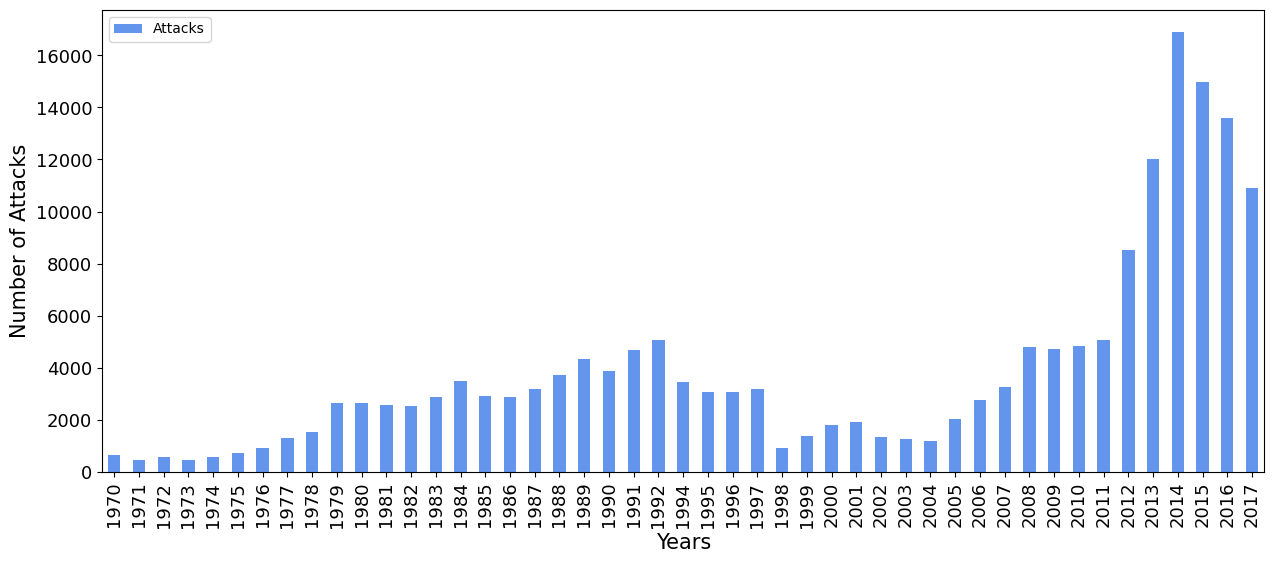

In [84]:
attacks.plot(kind='bar',color='cornflowerblue',figsize=(15,6),fontsize=13)
plt.xlabel('Years',fontsize=15)
plt.ylabel('Number of Attacks',fontsize=15)
plt.show()


### 2 - Number of attacks by region

In [119]:
reg = pd.crosstab(df.Year,df.Region)
reg.head()
reg.max()


Region
Australasia & Oceania            29
Central America & Caribbean    1148
Central Asia                     77
East Asia                        99
Eastern Europe                  962
Middle East & North Africa     6939
North America                   472
South America                  1492
South Asia                     4998
Southeast Asia                 1188
Sub-Saharan Africa             2321
Western Europe                 1020
dtype: int64

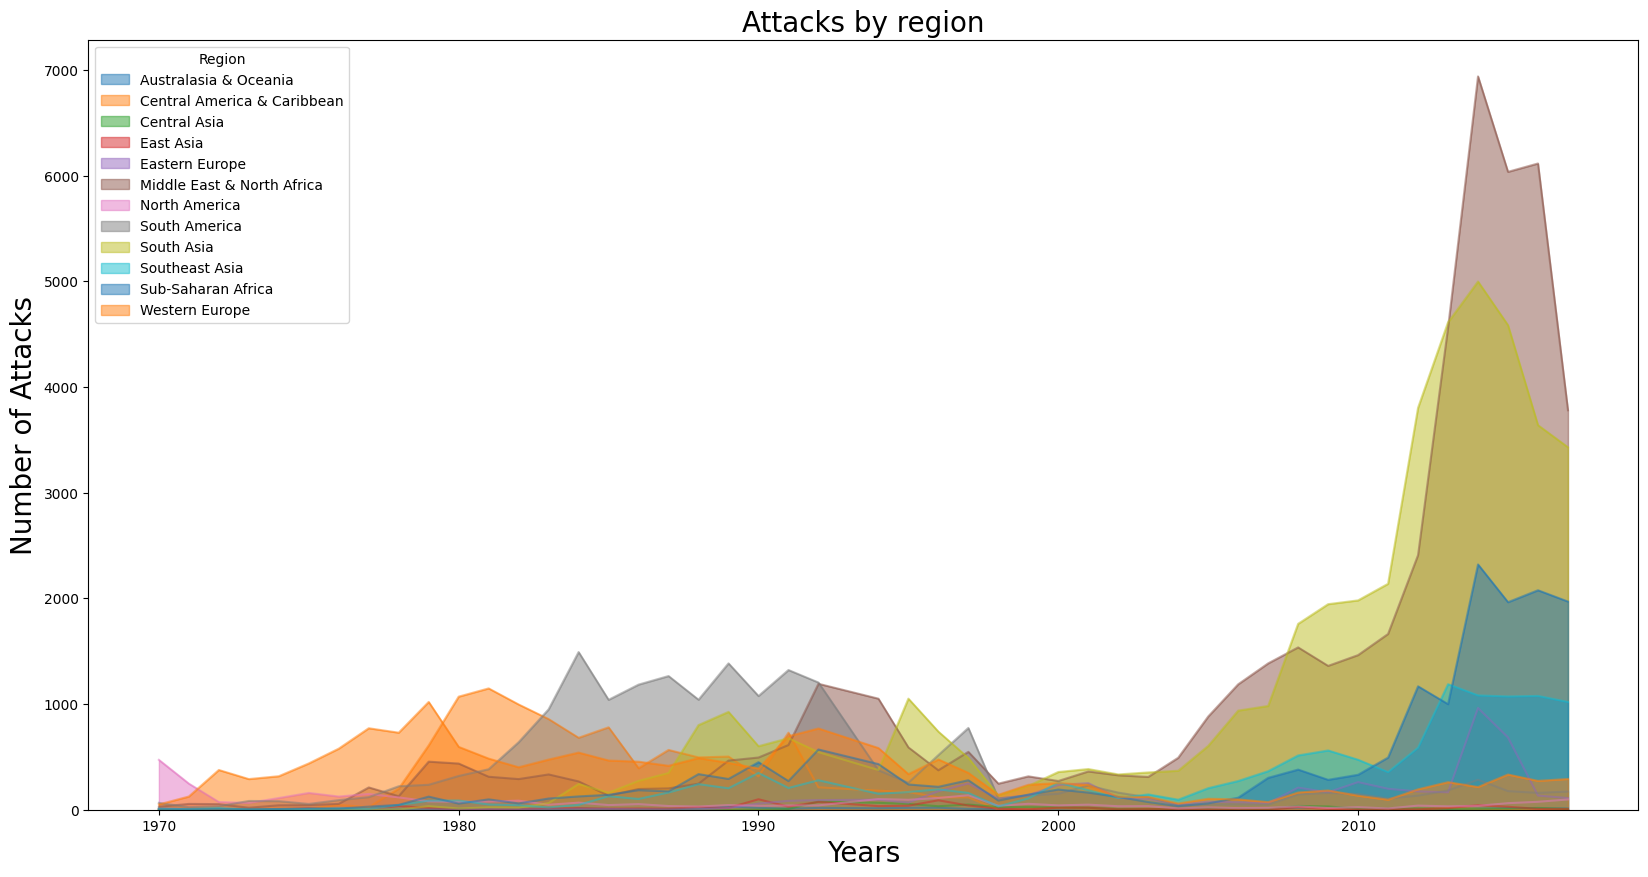

In [94]:
reg.plot(kind='area', stacked=False, alpha=0.5,figsize=(20,10))
plt.title('Attacks by region',fontsize=20)
plt.xlabel('Years',fontsize=20)
plt.ylabel('Number of Attacks',fontsize=20)
plt.show()

### 3 - Number of attacks by country

In [127]:
ct=df['Country'].value_counts().head(20)
ct.head()

Iraq           24636
Pakistan       14368
Afghanistan    12731
India          11960
Colombia        8306
Name: Country, dtype: int64

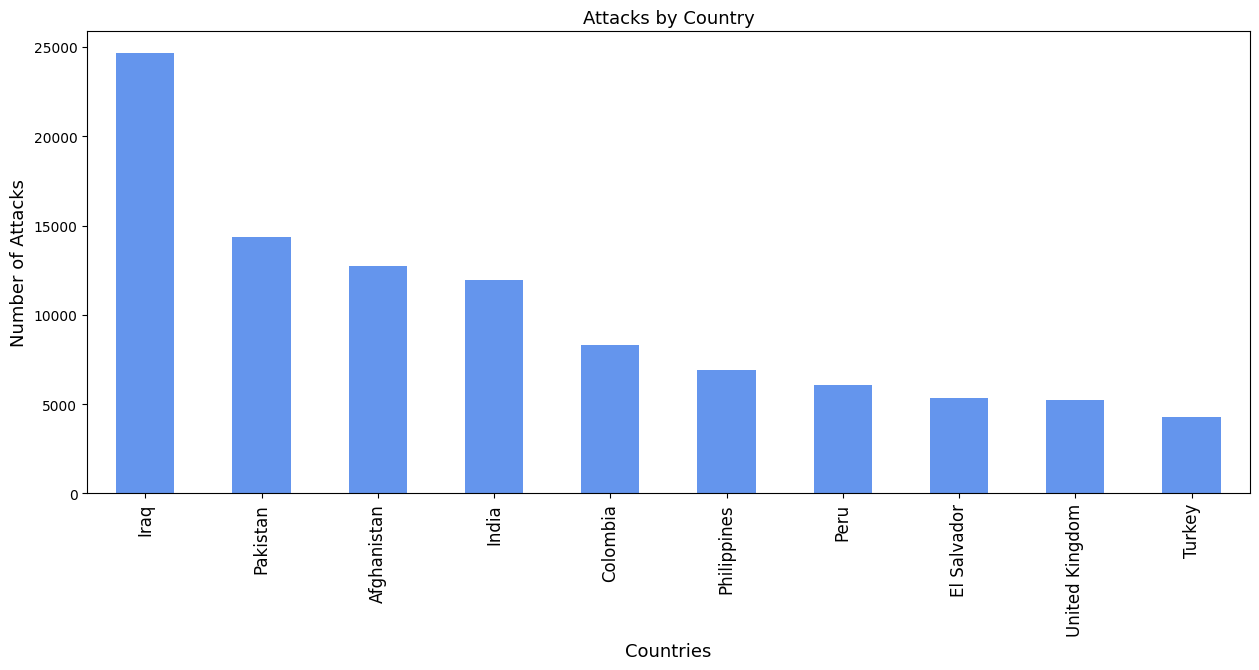

In [101]:
ct.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title('Attacks by Country',fontsize=13)
plt.xlabel('Countries',fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()


### 4 - Number of attacks by group

In [131]:
grp = df['Group Name'].value_counts()[1:11]
grp.head(10)


Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Kurdistan Workers' Party (PKK)                      2310
Name: Group Name, dtype: int64

Text(0, 0.5, 'Number of attacks')

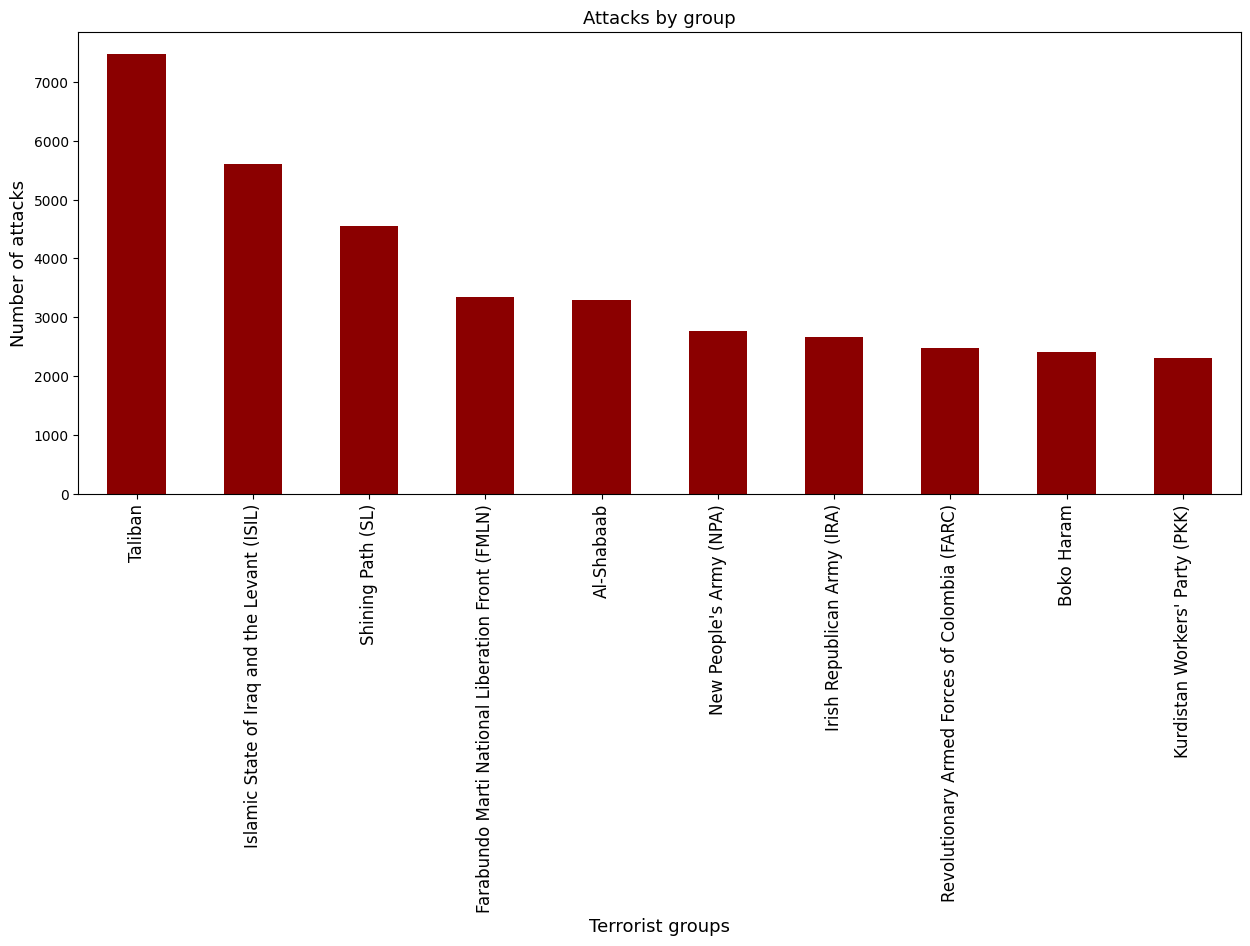

In [106]:
grp.plot(kind='bar', color='darkred', figsize=(15,6))
plt.title('Attacks by group', fontsize=13)
plt.xlabel('Terrorist groups', fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel('Number of attacks', fontsize=13)

### 5 - Number of attacks by attack type

In [107]:
at=df['Attack Type'].value_counts()
at


Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: Attack Type, dtype: int64

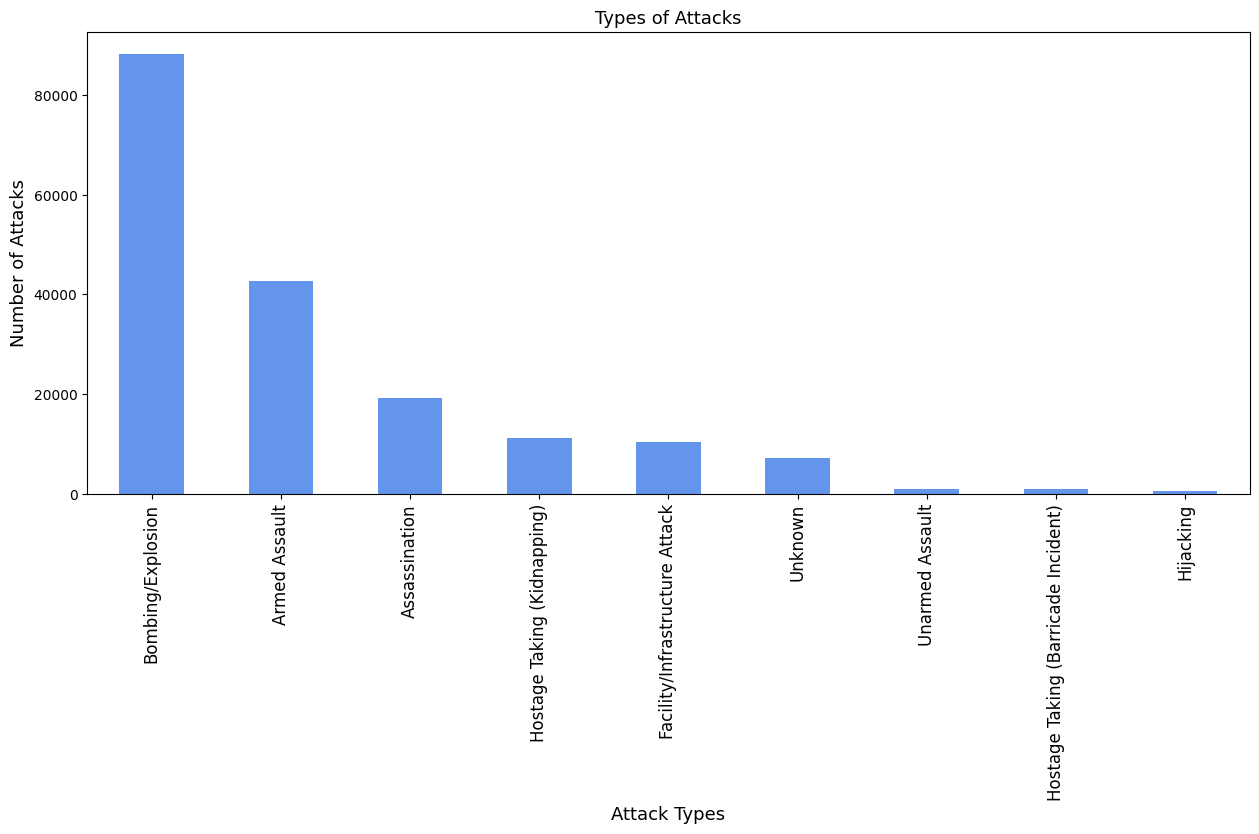

In [111]:
at.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Types of Attacks",fontsize=13)
plt.xlabel("Attack Types",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()


### 6 - Number of attacks by target

In [112]:
trg=df['Target'].value_counts()
trg

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: Target, dtype: int64

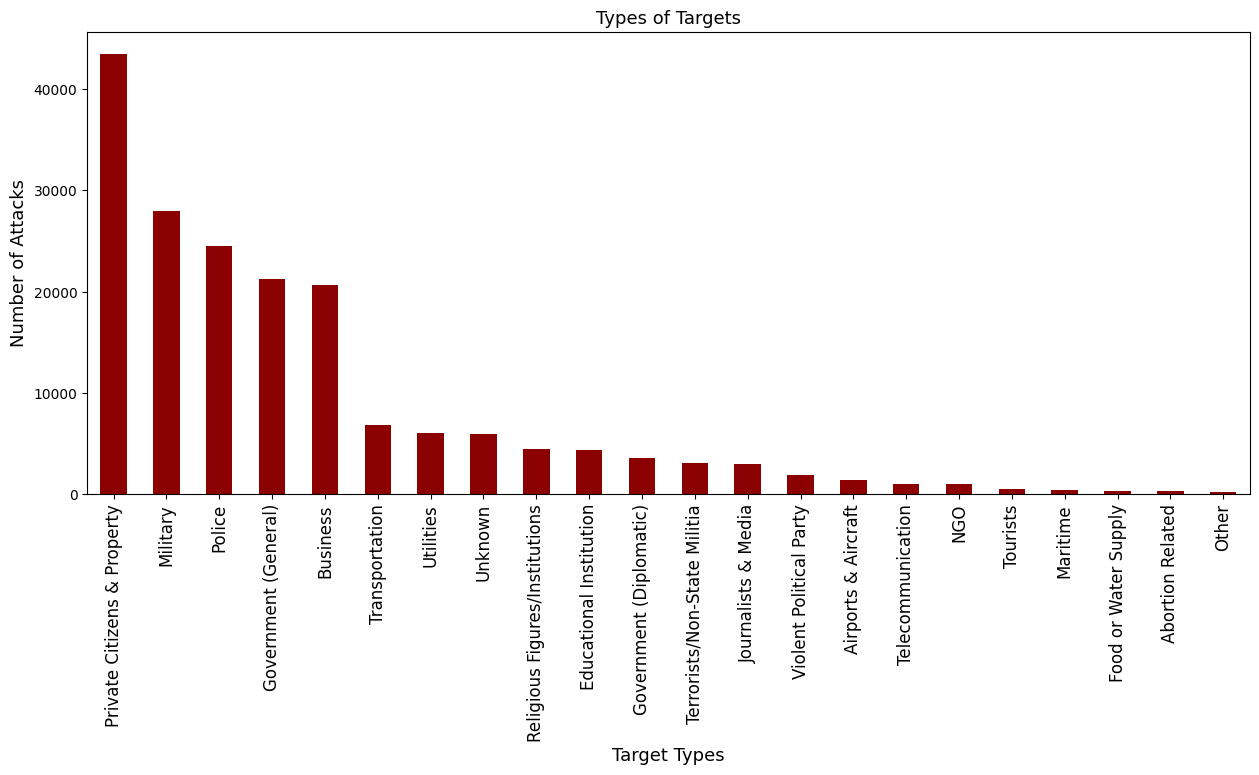

In [113]:
trg.plot(kind="bar",color="darkred",figsize=(15,6))
plt.title("Types of Targets",fontsize=13)
plt.xlabel("Target Types",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()


## **Observations**

1. **Attacks by year** :

    Most number of attacks: 16903 in 2014

    Least number of attacks: 471 in 1971


2. **Attacks by region** :

    Most number of attacks: Middle East & North Africa with 50474 attacks
    
    Least number of attacks: Australasia & Oceania with 282 attacks


3. **Attacks by country [Top 10]** :

    Most number of attacks: Iraq with 24636 attacks
    
    Least number of attacks: Turkey with 4292


4. **Attacks by group [Top 10]** :

    Most number of attacks: Taliban with 7478
    
    Least number of attacks: Boko Haram with 2418


5. **Attacks by attack type** :

    Most number of attacks: 88255 by "Bombing/Explosion"
    
    Least number of attacks: 659 by "Hijacking"


6. **Attacks by target** :

    Most number of attacks: 43511 over "Private Citizens & Property"
    
    Least number of attacks: 263 over "Abortion Related"
